In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.65,NaN,0.53,NaN,9.30,0.60,NaN,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	0
int64		column 5	0
float64		column 6	29
float64		column 7	14
float64		column 8	7
float64		column 9	14
float64		column 10	0
float64		column 11	7
float64		column 12	29
float64		column 13	8


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,178.000000,178.000000,178.000000,178.000000,178.000000,149.000000,164.000000,171.000000,164.000000,178.000000,171.000000,149.000000,170.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.276242,2.032256,0.362982,1.582744,5.058090,0.954655,2.606980,749.452941
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.639580,1.001589,0.124087,0.571170,2.318286,0.229867,0.724387,316.253757
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.700000,1.190000,0.270000,1.235000,3.220000,0.775000,1.860000,500.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.230000,2.155000,0.340000,1.545000,4.690000,0.970000,2.780000,675.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.865000,0.445000,1.950000,6.200000,1.120000,3.180000,988.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

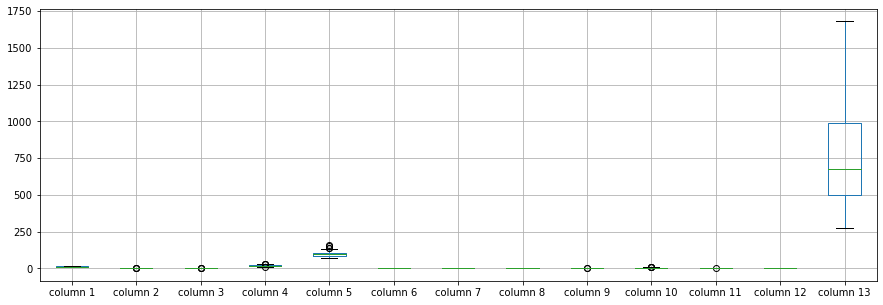

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.000618
column 2       2.336348
column 3       2.366517
column 4      19.494944
column 5      99.741573
column 6       2.276242
column 7       2.032256
column 8       0.362982
column 9       1.582744
column 10      5.058090
column 11      0.954655
column 12      2.606980
column 13    749.452941
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.094397,0.211545,-0.310235,0.270798,0.300537,0.219832,-0.150399,0.143285,0.546364,-0.068623,0.102543,0.641977
column 2,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.410144,-0.431752,0.309189,-0.239745,0.248985,-0.557198,-0.438081,-0.205062
column 3,0.211545,0.164045,1.000000,0.443367,0.286587,0.102215,0.145387,0.161474,0.010085,0.258887,-0.084595,0.049699,0.211367
column 4,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.402785,-0.311365,0.379730,-0.215525,0.018732,-0.283459,-0.324785,-0.442886
column 5,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.230437,0.233656,-0.261698,0.297170,0.199950,0.076153,0.099716,0.402997
column 6,0.300537,-0.410144,0.102215,-0.402785,0.230437,1.000000,0.889668,-0.474325,0.665465,-0.082121,0.475150,0.745489,0.533569
column 7,0.219832,-0.431752,0.145387,-0.311365,0.233656,0.889668,1.000000,-0.549449,0.669958,-0.190561,0.549555,0.799163,0.476014
column 8,-0.150399,0.309189,0.161474,0.379730,-0.261698,-0.474325,-0.549449,1.000000,-0.395100,0.142337,-0.249461,-0.544335,-0.337051
column 9,0.143285,-0.239745,0.010085,-0.215525,0.297170,0.665465,0.669958,-0.395100,1.000000,-0.053424,0.342176,0.551056,0.397744
column 10,0.546364,0.248985,0.258887,0.018732,0.199950,-0.082121,-0.190561,0.142337,-0.053424,1.000000,-0.534007,-0.417513,0.325394


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+21,13+21+21,13+21+21,13+21+21+21+21,13+21+21+21+21+21,13+21+21+21+21+21+21,13+21+21+21+21+21,13+21+21+21+21,13+21+21+21,13+21+21,13+21,13], vae_layer = False, seed = 210)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 927.4305641867898
Epoch: 1 , loss: 924.5924738103694
Epoch: 2 , loss: 924.2237937233665
Epoch: 3 , loss: 928.1242453835227
Epoch: 4 , loss: 924.1086980646306
Epoch: 5 , loss: 931.4702037464489
Epoch: 6 , loss: 921.0977394797585
Epoch: 7 , loss: 920.0686867453835
Epoch: 8 , loss: 928.3365367542614
Epoch: 9 , loss: 922.3279529918324
Epoch: 10 , loss: 923.362715287642
Epoch: 11 , loss: 930.0396451083096
Epoch: 12 , loss: 925.2897671786221
Epoch: 13 , loss: 932.4456620649858
Epoch: 14 , loss: 928.465370871804
Epoch: 15 , loss: 928.7006114612926
Epoch: 16 , loss: 930.3929554332386
Epoch: 17 , loss: 924.7655417702415
Epoch: 18 , loss: 927.375565962358
Epoch: 19 , loss: 922.6225918856534
Epoch: 20 , loss: 928.0243974165483
Epoch: 21 , loss: 923.8736960671165
Epoch: 22 , loss: 921.1711925159801
Epoch: 23 , loss: 921.2461991743608
Epoch: 24 , loss: 933.3075672496449
Epoch: 25 , loss: 928.4804798473011
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
174,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
175,0.0,0.0,0.0,0.0,0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
176,0.0,0.0,0.0,0.0,0,0.0,1.63143,0.0,0.308191,0.0,0.0,1.101585,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2102.738931160126, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.1929458501843537

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06000,0.28,2.290000,5.64,1.04,3.920000,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76000,0.26,1.280000,4.38,1.05,3.400000,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24000,0.30,2.810000,5.68,1.03,3.170000,1185.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49000,0.24,2.180000,7.80,0.86,3.450000,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69000,0.39,1.820000,4.32,1.04,2.930000,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61000,0.52,1.060000,7.70,0.64,1.740000,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75000,0.43,1.410000,7.30,0.70,1.560000,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69000,0.43,1.350000,10.20,0.59,1.560000,835.0
176,13.17,2.59,2.37,20.0,120,1.65,2.31143,0.53,1.768191,9.30,0.60,2.721585,840.0


In [20]:
imputations[-1].to_excel("Wine_AN_5(imp).xlsx", index=False, header=False)